In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
import numpy as np
import matplotlib.pyplot as plt

C:\Users\apate\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

501

(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 128, 3)
(32,)
[5 0 4 7 6 4 0 7 1 9 9 0 1 5 4 9 1 2 9 0 1 4 7 2 1 9 9 0 0 6 9 3]
(32, 128, 

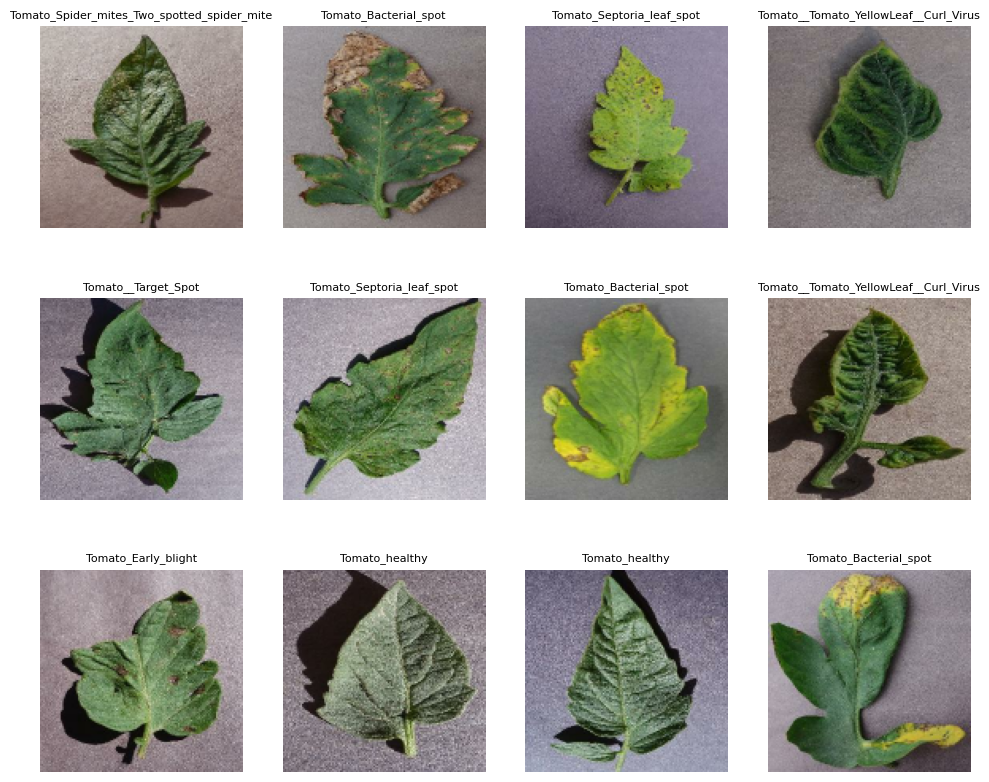

In [6]:
plt.figure(figsize=(12,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        print(image_batch.shape)
        print(label_batch.shape)
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]],fontsize=8)
        plt.axis('off')
        print(label_batch.numpy())

In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [9]:
len(train_ds)

400

In [10]:
len(val_ds)

50

In [11]:
len(test_ds)

51

In [12]:
def preprocess(image,label):
    image = tf.image.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
    image = tf.cast(image,tf.float32)/255.0
    return image,label

In [13]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label

In [14]:
train_ds = train_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.map(augment,num_parallel_calls=tf.data.AUTOTUNE)

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
model = Sequential()

model.add(Conv2D(32,3,activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\apate\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,362 (642.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=EPOCHS,verbose=1,validation_data=val_ds)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 140s 303ms/step - accuracy: 0.4772 - loss: 1.4804 - val_accuracy: 0.6562 - val_loss: 0.9840
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 104s 260ms/step - accuracy: 0.7358 - loss: 0.7640 - val_accuracy: 0.8037 - val_loss: 0.5862
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 292s 732ms/step - accuracy: 0.8288 - loss: 0.4962 - val_accuracy: 0.8456 - val_loss: 0.4572
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.8701 - loss: 0.3787 - val_accuracy: 0.8537 - val_loss: 0.4222
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.8965 - loss: 0.2984 - val_accuracy: 0.8969 - val_loss: 0.3205
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 106s 265ms/step - accuracy: 0.9123 - loss: 0.2509 - val_accuracy: 0.9044 - val_loss: 0.2849
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 104s 259ms/step - accuracy: 0.9136 - loss: 0.2505 - val_accuracy: 0.9162 - val_loss: 0.2537
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 102s 256ms/step - accuracy: 0.9348 - lo

In [20]:
scores = model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 80ms/step - accuracy: 0.9369 - loss: 0.1860 


In [21]:
scores

[0.1860342025756836, 0.936887264251709]

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

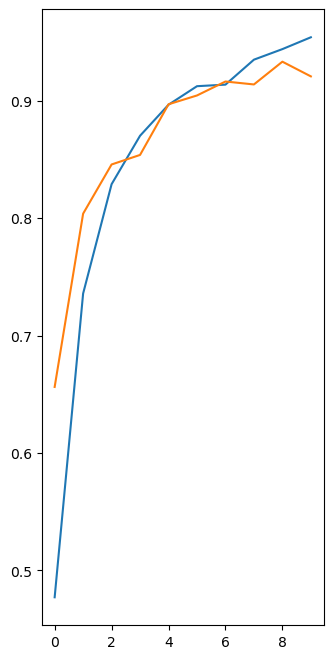

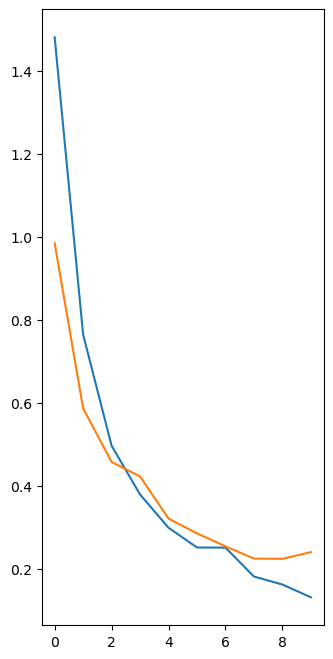

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training acc')
plt.plot(range(EPOCHS),val_acc,label='val acc')  

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='loss')
plt.plot(range(EPOCHS),val_loss,label='val loss')      

first image to predict
actual_label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
predicted_label: Tomato_Late_blight


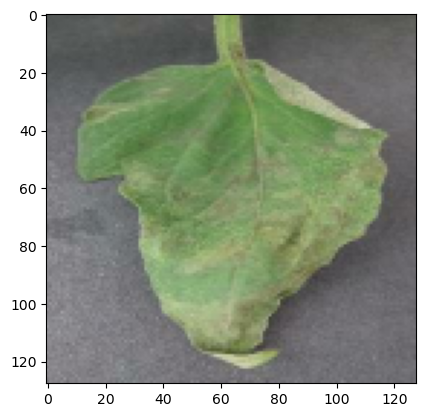

In [24]:
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy()
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual_label:',class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('predicted_label:',class_names[np.argmax(batch_prediction[0])])
    

In [30]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


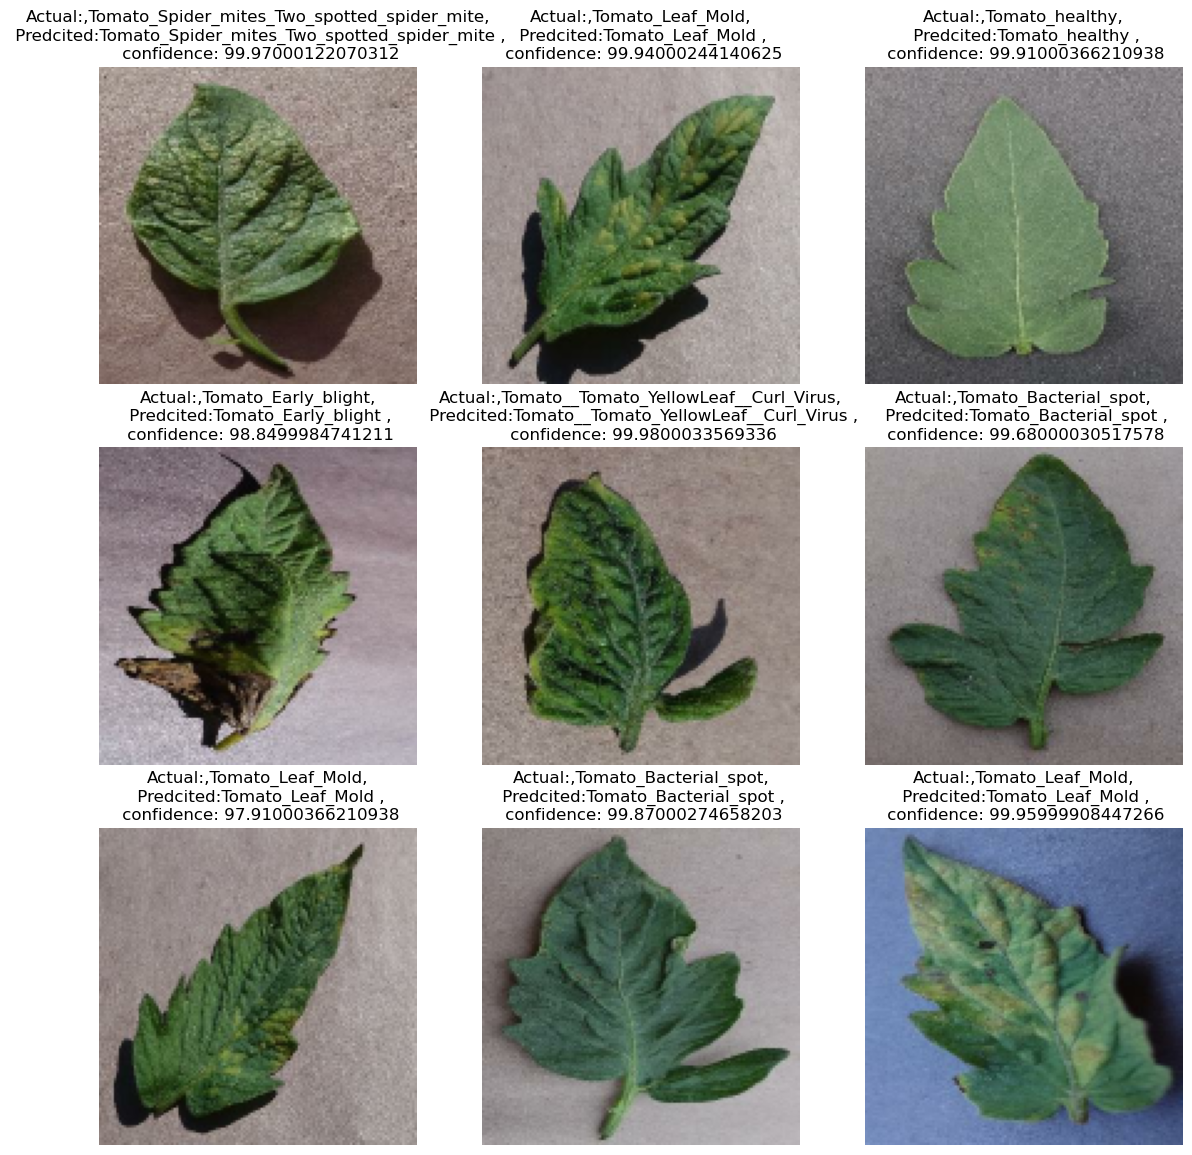

In [31]:
plt.figure(figsize=(14,14))
for images,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[label[i]]

        plt.title(f'Actual:,{actual_class},\n Predcited:{predicted_class} ,\n confidence: {confidence}')
        
        plt.axis('off')

In [33]:
model_version = 1
model.save(f"../saved_model/{model_version}.keras")